<a href="https://colab.research.google.com/github/SambhavDjain/Ml_Projects/blob/main/Intro_to_Neural_Network_Classification_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to neural network classification with TensorFlow
In tis notebooks we are going to learn how to write a neural netwoerkd for classification problems.
A classification iis where you try to classify something as one thing or another.
A few types of classifiation are:
* Binary classification
* Multiclass classification
* Multilabel classification

In [6]:
from sklearn.datasets import make_circles
#Make 1000 exaples
n_samples = 1000
#Create Circles
X,Y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)




In [7]:
#Check features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

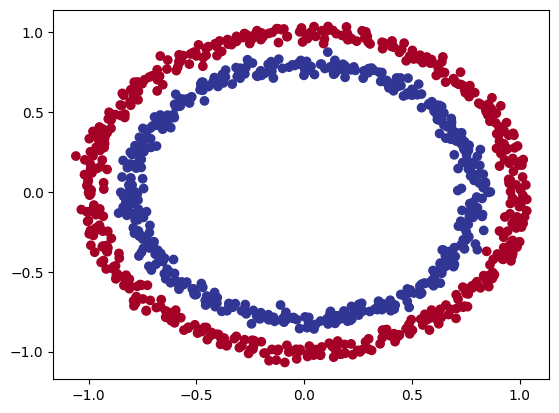

In [8]:
#Visualize with plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1] ,c = Y,cmap=plt.cm.RdYlBu);
#X[:, 0]	Selects all rows from column 0 → used as x-axis values
#X[:, 1]	Selects all rows from column 1 → used as y-axis values
# c = Y- Colors each point based on its label/class from Y

###Input And Output shapes

In [9]:
#Check the shape of feature and labels
X.shape,Y.shape

((1000, 2), (1000,))

In [10]:
#How many smaple we are working with
len(X),len(Y)

(1000, 1000)

In [11]:
#View the first example of features and labels
X[4],Y[5]

(array([ 0.44220765, -0.89672343]), np.int64(1))

##Steps in modelling
1. Create or import the model
2. compile the model
3. fit the model
4. Evaluate the model
5. tweak
6. Evaluate ...


In [12]:
import tensorflow as tf
#set random seed
tf.random.set_seed(42)

#Create model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
#compile model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["accuracy"])
#fit the model
model_1.fit(X,Y,epochs=5)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4798 - loss: 5.1954
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4794 - loss: 4.6563 
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4910 - loss: 3.1589 
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5112 - loss: 0.7223 
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4914 - loss: 0.7022


In [13]:
#Lets improve the model
model_1.fit(X,Y,epochs=100,verbose=0)
model_1.evaluate(X,Y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4852 - loss: 0.6927  


[0.6932879686355591, 0.4729999899864197]

In [14]:
#set random seed
tf.random.set_seed(42)

#Create model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])
#compile model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["accuracy"])
#fit the model
model_2.fit(X,Y,epochs=100,verbose=0)

In [15]:
#evaluate
model_2.evaluate(X,Y)
#still the same accuracy

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4077 - loss: 0.6928  


[0.6935251355171204, 0.414000004529953]

##Improving model
1. create model- add hidden layers
2. compile model= change the optimizers
3. fit model = more epochs

In [16]:
#set seed
tf.random.set_seed(42)
#create model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
#compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics =["accuracy"] )
#fit the model
model_3.fit(X,Y,epochs= 100,verbose=0)

In [17]:
#evaluate the model
model_3.evaluate(X,Y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5040 - loss: 0.6916


[0.695151150226593, 0.4880000054836273]

To visualize our model prediction lets create a function `plot_decision_boundary()`
* take trained model, features(X) and labels(Y)
* Create a tf.meshgrid of different X values
* Make predictions across the meshgrid
* polt the predictions as well as a line between zones(where each unique class falls)


Main Key is  `visualize ` ` visualize` `visualize`

In [18]:
import numpy as np



In [19]:
def plot_decision_boundary(model,X,Y):
  """Plot the decisions boundary created by model predicting X
  """
  #Define the axis boundaries of the plot and create a meshgrid
  X_min,X_max = X[:,0].min() - 0.1,X[:,0].max()+0.1  #X[:, 0]: pehla feature column (x-axis
  Y_min,Y_max = X[:,1].min() - 0.1,X[:,1].max()+0.1  #X[:, 1]: doosra feature column (y-axis) min() - 0.1 aur max() + 0.1: margin add kiya plot ke edges
  XX, YY, = np.meshgrid(np.linspace(X_min,X_max,100), # np.meshgrid: plotting ke liye 2D grid banata hai.np.linspace(..., 100): 100 points banata hai between X_min and X_max
                        np.linspace(Y_min,Y_max,100))
  #Create X values (we're going to make predictions on these)
  X_in= np.c_[XX.ravel(),YY.ravel()] #XX.ravel() and YY.ravel() se 2D grids ko 1D banaya jata hai, np.c_[]: in dono arrays ko side by side stack karta hai

  #Make predictions
  Y_pred = model.predict(X_in)
  #Check for multi-class
  if len(Y_pred[0])>1: #Agar Y_pred[0] ka length > 1 matlab yeh probabilities for multiple classes hain
    print("doing multiclass classification")
    #We have to respahe our prediction to get them ready for plotting
    Y_pred =  np.argmax(Y_pred,axis=1).reshape(XX.shape) #np.argmax(..., axis=1): har row me sabse bada probability wala class select karta hai
  else:
      print("doing binary classification")
      Y_pred = np.round(Y_pred).reshape(XX.shape)



  #plot the decision boundary
  plt.contourf(XX,YY,Y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)#alpa for transparency contourf filled colours bnata h
  plt.scatter(X[:,0],X[:,1],c=Y,s=40,cmap=plt.cm.RdYlBu)#c=Y: har point ka actual class
  plt.xlim(XX.min(),XX.max())
  plt.ylim(YY.min(),YY.max())

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classification


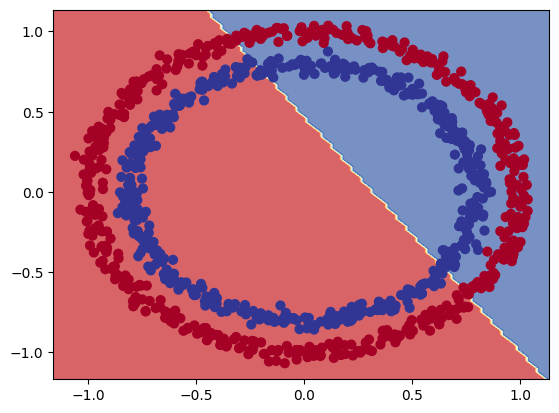

In [20]:
#check the predictions opur model make
plot_decision_boundary(model = model_3,X=X,Y=Y)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classification


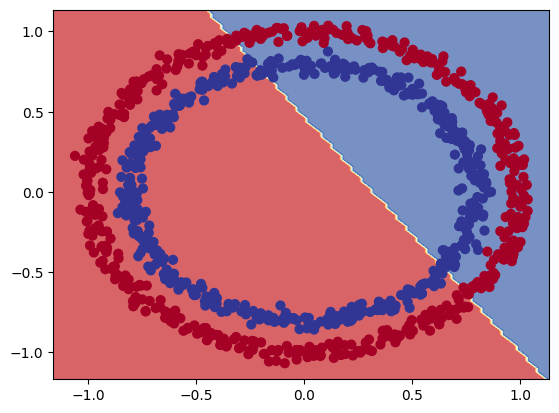

In [21]:
#check the predictions opur model make
plot_decision_boundary(model = model_3,X=X,Y=Y)

In [69]:
#Mking that our classification model works for regression dataset
tf.random.set_seed(42)
#Create some regression data
X_regression =  tf.range(0,1000,5)
Y_regressiom = tf.range(100,1100,5) #y = x+100

#split regression data into traini9ng and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
Y_reg_train = Y_regressiom[:150]
Y_reg_test = Y_regressiom[150:]

#Fit model;
model_3.fit(X_reg_train,Y_reg_train,epochs=100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 36.1991 - mae: 36.1991  
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 36.2001 - mae: 36.2001 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 36.1300 - mae: 36.1300 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 36.0613 - mae: 36.0613  
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 35.9794 - mae: 35.9794 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 35.9240 - mae: 35.9240 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 35.8557 - mae: 35.8557 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 35.8436 - mae: 35.8436
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 35.7846 - mae: 35.7846 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 35.6504 - mae: 35.6504 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 35.7122 - mae: 35.7122 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 35.5126 - mae: 35.5126 
Epoch 13/100
5/5 ━━━━━━

In [23]:
#Recreating the model_3
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,input_shape=(1,)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
    ])

model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics =["mae"])
model_3.fit(X_reg_train,Y_reg_train,epochs = 100)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 440.8454 - mae: 440.8454
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 323.8868 - mae: 323.8868  
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 203.8540 - mae: 203.8540 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 82.1956 - mae: 82.1956   
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 65.5644 - mae: 65.5644 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 84.7884 - mae: 84.7884 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 58.8300 - mae: 58.8300 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 43.9583 - mae: 43.9583
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 48.0223 - mae: 48.0223 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 42.0467 - mae: 42.0467 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 44.0997 - mae: 44.0997 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 40.2576 - mae: 40.2576 
Epoch 13/100
5/5 ━━━━━━━━━━━━

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


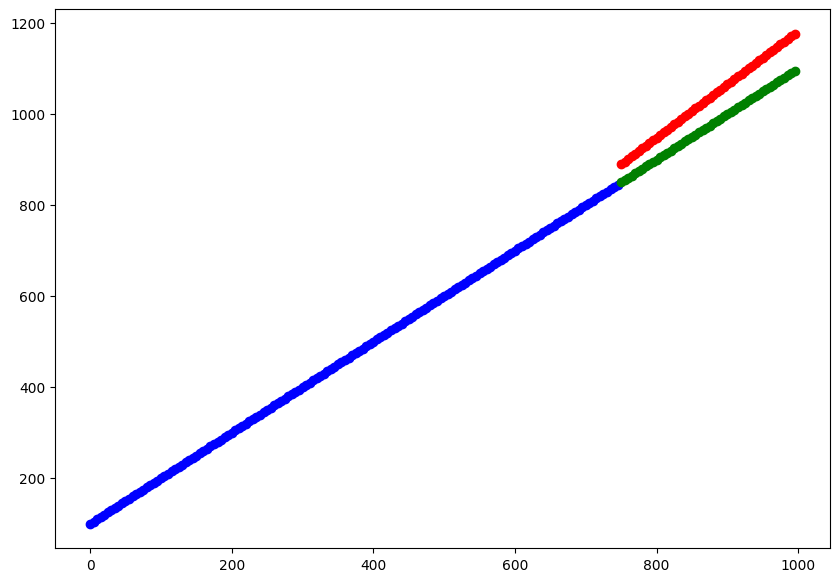

In [24]:
#Makepredictions
Y_reg_pred = model_3.predict(X_reg_test)

#plot
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train,Y_reg_train,c = "b",label = "Training data ")
plt.scatter(X_reg_test,Y_reg_test,c = "g",label = "Testing  data ")
plt.scatter(X_reg_test,Y_reg_pred,c = "r",label = "predicted data")

###The missing piece : Non-Linearity

In [25]:
#Set the seed
tf.random.set_seed(42)
# Create the model
model_4  = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation =tf.keras.activations.linear)
])
#Compile the model
model_4.compile(loss = "BinaryCrossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics = ["accuracy"])
#Fit the model
history = model_4.fit(X,Y,epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4830 - loss: 4.6510
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4830 - loss: 4.3829
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4830 - loss: 4.2094
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4830 - loss: 4.0926
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4830 - loss: 3.9870
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4830 - loss: 3.7793
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4830 - loss: 3.6290
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4818 - loss: 3.5938
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4807 - loss: 3.5559
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4798 - loss: 3.5341
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4798 - loss: 3.3688
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

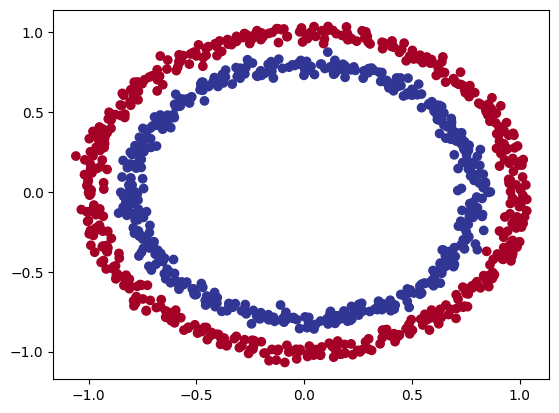

In [26]:
#Check our data
plt.scatter(X[:,0],X[:,1],c = Y,cmap = plt.cm.RdYlBu);

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classification


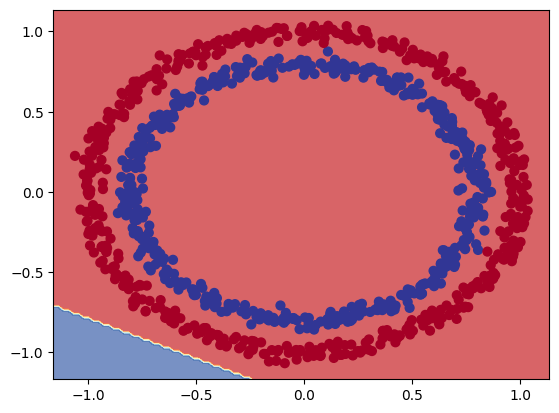

In [27]:
#Check the decision boundary for ur latest model
plot_decision_boundary(model=model_4,
                       X=X,
                       Y=Y)

##Lets build a neural network with a non linear activation function


In [28]:
#set random seed
tf.random.set_seed(42)
#Crete a model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation = tf.keras.activations.relu)
])

#Comiple the model
model_5.compile(loss = "BinaryCrossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics = ["accuracy"])
#Fit the mdoel
model_5.fit(X,Y,epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4677 - loss: 4.9106
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4677 - loss: 4.8854 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4688 - loss: 4.8759
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4675 - loss: 4.8073 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4650 - loss: 4.7395
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4650 - loss: 4.7304
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4650 - loss: 4.7025
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4650 - loss: 4.6514
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4650 - loss: 4.6442 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4650 - loss: 4.6389 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4643 - loss: 4.6344 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc

In [29]:
#time to replicate the multilayer neural network from tensorflow playgeround

#Set random seed
tf.random.set_seed(42)

#Create model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation ="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)


])
#Compile the model
model_6.compile(loss ="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics = ["accuracy"])
#Fit the model
history = model_6.fit(X,Y,epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4830 - loss: 1.4477
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4830 - loss: 1.1067
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4825 - loss: 1.0097
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4215 - loss: 0.9461
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3373 - loss: 0.9008
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3157 - loss: 0.8716
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3416 - loss: 0.8521
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3435 - loss: 0.8374
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3560 - loss: 0.8257
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3691 - loss: 0.8160
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3768 - loss: 0.8076
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

In [30]:
#evaluate model
model_6.evaluate(X,Y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6419 - loss: 0.6295  


[0.62631756067276, 0.6460000276565552]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
doing binary classification


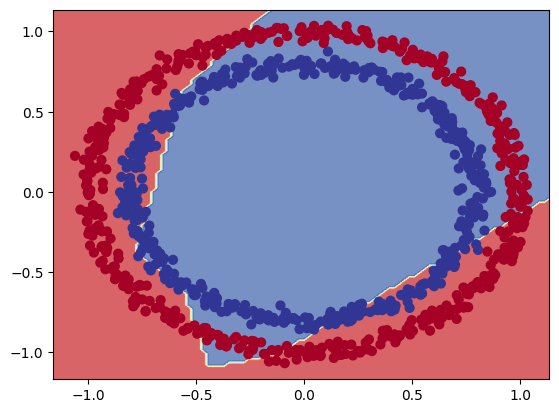

In [31]:
# plotting how model looks like
plot_decision_boundary(model_6,X,Y)

In [32]:

#set random seed
tf.random.set_seed(42)
#Create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(1,activation = "sigmoid"), #using this when its inary classification
])

#compile model
model_7.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics = ["accuracy"])

#fit the model
model_7.fit(X,Y,epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5064 - loss: 0.7043
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5106 - loss: 0.6989
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5145 - loss: 0.6955 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5125 - loss: 0.6931
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5109 - loss: 0.6913
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5150 - loss: 0.6898
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5196 - loss: 0.6886
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5213 - loss: 0.6875
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5239 - loss: 0.6864
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5281 - loss: 0.6854
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5286 - loss: 0.6845
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy

In [33]:
#evaluate the model
model_7.evaluate(X,Y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9956 - loss: 0.1872


[0.1848781853914261, 0.996999979019165]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
doing binary classification


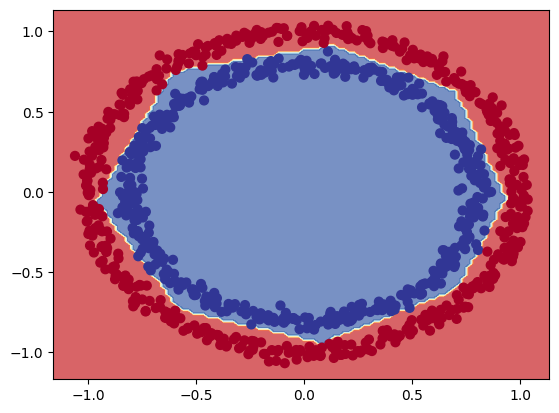

In [34]:
#plot the model
plot_decision_boundary(model_7,X,Y)

📚:Whats wrong with our predictions we hav made? are we really evaluating our model correctt?  
**hint**- what data did the mdeol learn on ehat data er predict on ?

🔑Note : the combination of **(linaer st lines )** and **(non linear non_st lines)** function is one of the fundamentals of neural networks.




###Now lets see the concept of linear and non linear

In [35]:
#cretae a toy a tensor (similar to data we ahve pass into models)
A = tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

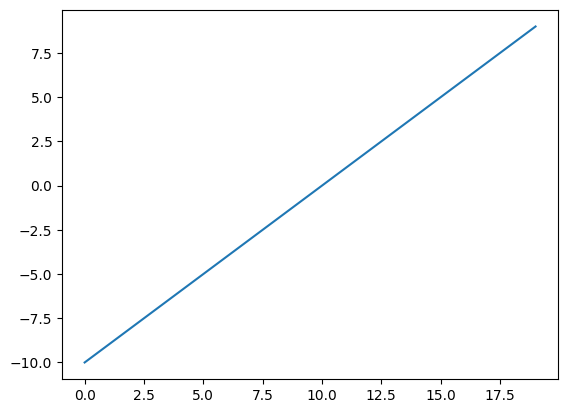

In [36]:
#plot the data or visualize it
plt.plot(A)

In [37]:
#Lets rplicate the sigmoid function - 1/(1+exp(-x))
def sigmoid(x):
  return 1/(1+tf.exp(-x))
#use the igmoid functuion on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

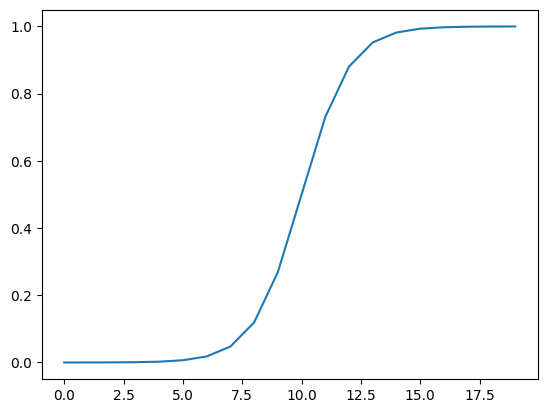

In [38]:
#plotting the function
plt.plot(sigmoid(A))

In [39]:
#let's replicate the relu function
def relu(x):
  return tf.maximum(0,x)
#pass to tensor to relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

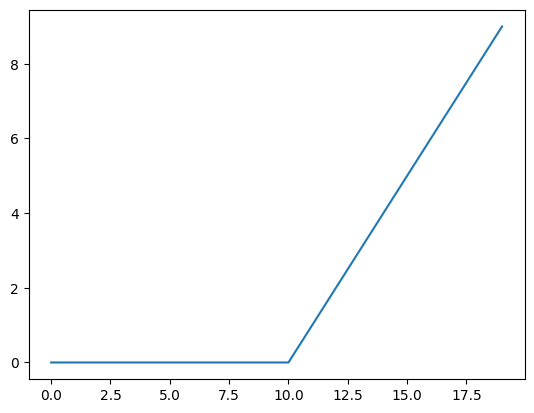

In [40]:
#Plot the relu function
plt.plot(relu(A))

In [41]:
#Lets doo it with linear functuion
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

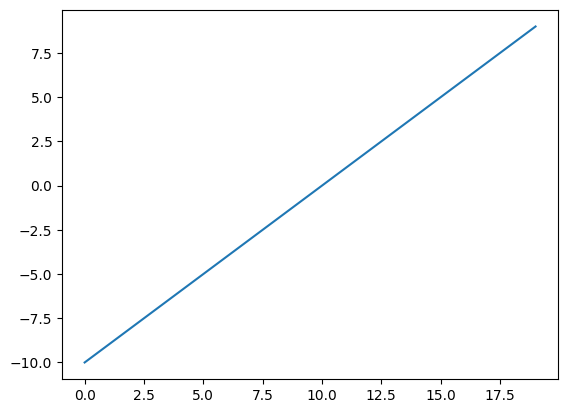

In [42]:
#Plot or visualize it
plt.plot(tf.keras.activations.linear(A))

###Evaluating and improving our classification


In [43]:
#check how many examples  we have
len(X)

1000

In [44]:
#split into train and test sets
X_train,Y_train = X[:800],Y[:800]
X_test,Y_test = X[800:],Y[800:]
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [45]:
#Let's recreate a model to fit on the traning data and evaluate on the

#set random seed
tf.random.set_seed(42)

#Create the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation = "relu"),
    tf.keras.layers.Dense(16,activation = "relu"),
    tf.keras.layers.Dense(1,activation = "sigmoid"),
])

#Compile the model
model_8.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics = ["accuracy"])
#Fit the model
history =model_8.fit(X_train,Y_train,epochs=25)

Epoch 1/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5003 - loss: 0.6919
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5187 - loss: 0.6885 
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5263 - loss: 0.6863 
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5304 - loss: 0.6835 
Epoch 5/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5424 - loss: 0.6787 
Epoch 6/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5679 - loss: 0.6730 
Epoch 7/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5796 - loss: 0.6645 
Epoch 8/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6341 - loss: 0.6519
Epoch 9/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7402 - loss: 0.6359
Epoch 10/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8206 - loss: 0.6153
Epoch 11/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8949 - loss: 0.5882
Epoch 12/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.931

In [46]:
#Evaluate modle
model_8.evaluate(X_test,Y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0978  


[0.09621722996234894, 1.0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classification


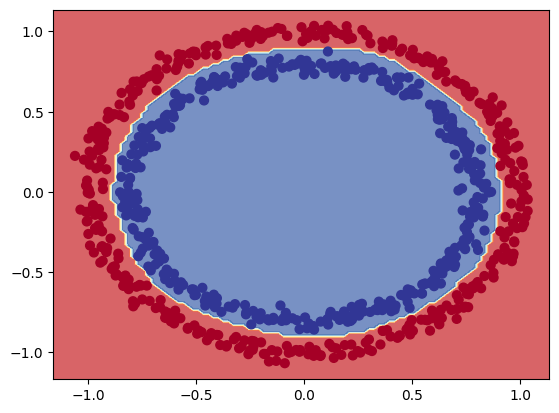

In [47]:
plot_decision_boundary(model_8,X_train,Y_train)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
doing binary classification
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classification


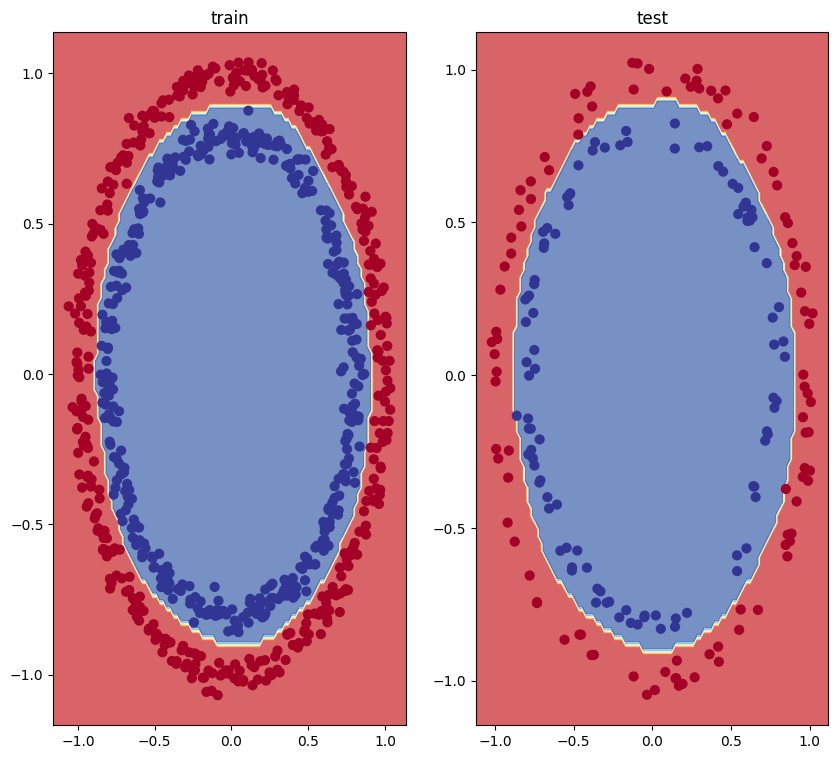

In [48]:
#for both training and test data
plt.figure(figsize=(10,9))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_8,X_train,Y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_8,X_test,Y_test)

#Plot the loss(or training ) curves


In [49]:
#converitng into Dataframe
import pandas as pd
import numpy as np
pd.DataFrame(history.history)


,accuracy,loss
0,0.50250,0.689428
1,0.52000,0.686226
2,0.52500,0.683307
3,0.53375,0.679549
4,0.54625,0.674516
5,0.56500,0.668339
6,0.58625,0.659049
7,0.66750,0.645738
8,0.78125,0.628657
9,0.86625,0.606647


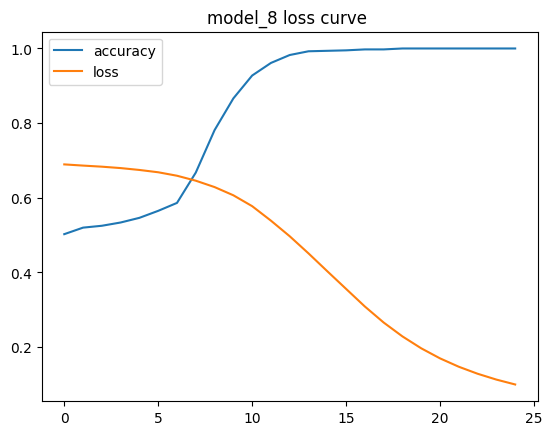

In [50]:
#Plot the loss curve
pd.DataFrame(history.history).plot()
plt.title("model_8 loss curve ");

**🔑:** The loss function going down means the model is improving (the prediction it's making are getting better with ground labels)

###Finding the best learning rate
to find the ideal learning rate (the lr where the loss decreases the most during training )
* A learning Rate **callback** - you can think of callbak as an extra piece of functionality and add to your *While* ita training.
*  Another model - we use same one as above but we're praticsing building models here
* a modified loss curves plot

In [51]:
#set random seed
tf.random.set_seed(42)

#Create the model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation = "relu"),
    tf.keras.layers.Dense(16,activation = "relu"),
    tf.keras.layers.Dense(1,activation = "sigmoid"),
])

#Compile the model
model_9.compile(loss = "binary_crossentropy",
                optimizer = "Adam",
                metrics = ["accuracy"])
#Create a learning rate callback
lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-4*10**(epoch/20))

#Fit the model
history_9 =model_9.fit(X_train,Y_train,epochs=100,callbacks = [lr_schedular])

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4851 - loss: 0.6910 - learning_rate: 1.0000e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4878 - loss: 0.6902 - learning_rate: 1.1220e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4906 - loss: 0.6896 - learning_rate: 1.2589e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4890 - loss: 0.6889 - learning_rate: 1.4125e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4932 - loss: 0.6883 - learning_rate: 1.5849e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5074 - loss: 0.6875 - learning_rate: 1.7783e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5363 - loss: 0.6866 - learning_rate: 1.9953e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5147 - loss: 0.6857 - learning_rate: 2.2387e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5016 - loss: 0.6845 - learning_

<Axes: xlabel='epochs'>

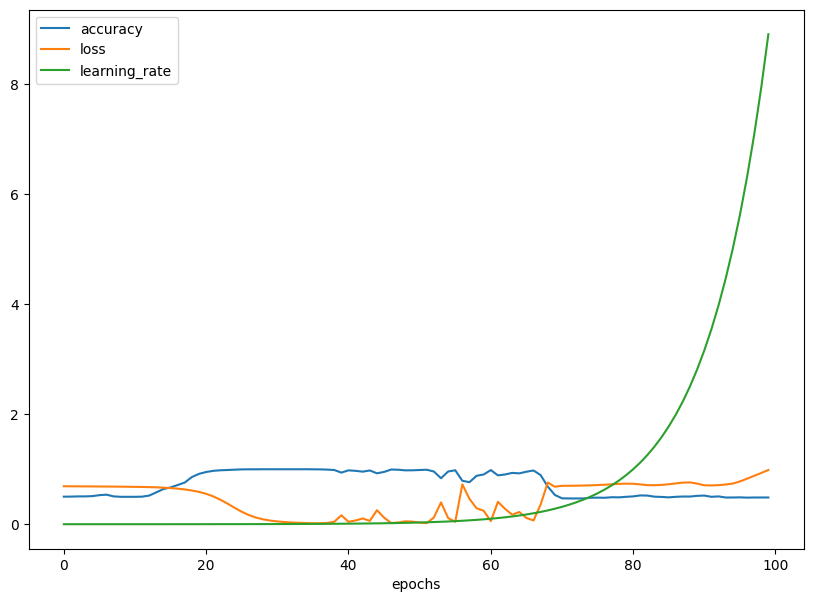

In [52]:
#Checking the history
pd.DataFrame(history_9.history).plot(figsize = (10,7),xlabel="epochs")

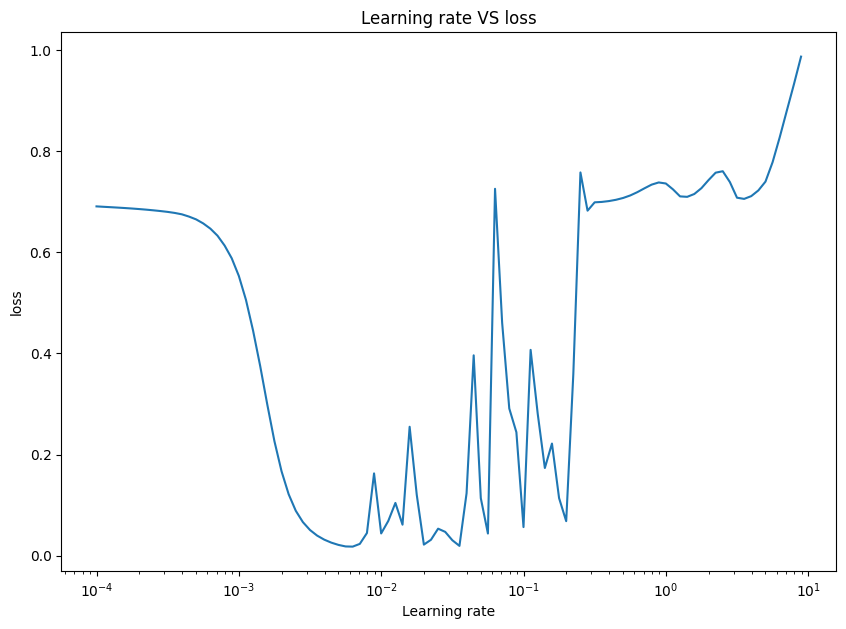

In [53]:
#Plot the learning rate versus the loss
lrs = 1e-4 * ( 10**(tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history_9.history["loss"])#semilog plot where the x-axis (learning rate) is logarithmic.
plt.xlabel("Learning rate")
plt.ylabel("loss")
plt.title("Learning rate VS loss");

In [54]:
#Examples of learning rates values:
10**0,10**-1,10**-2,10**-3,1e-4 #1e-4*10**(epoch/20) its the formual to find the lr

(1, 0.1, 0.01, 0.001, 0.0001)

In [55]:
#Learning rate we used in model_8
10**-3

0.001

In [79]:
#lets try sing the ideal learning rate with same model
#set random seed
tf.random.set_seed(42)

#Create the model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid"),

])
#compile model
model_10.compile(loss = "binary_crossentropy",
                 optimizer = tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics =["accuracy"])
#Fit the model
history_10 = model_10.fit(X_train,Y_train,epochs=20)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4910 - loss: 0.6902
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5324 - loss: 0.6868
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5572 - loss: 0.6769
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5721 - loss: 0.6627 
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5840 - loss: 0.6412 
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7470 - loss: 0.5957 
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7835 - loss: 0.5321 
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8399 - loss: 0.4614 
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8764 - loss: 0.3999 
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9138 - loss: 0.3413 
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9407 - loss: 0.2939 
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9

In [80]:
#Evaluate model_10
model_10.evaluate(X_test,Y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9806 - loss: 0.0915  


[0.08686947822570801, 0.9850000143051147]

In [58]:
model_8.evaluate(X_test,Y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0978 


[0.09621722996234894, 1.0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classification
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classification


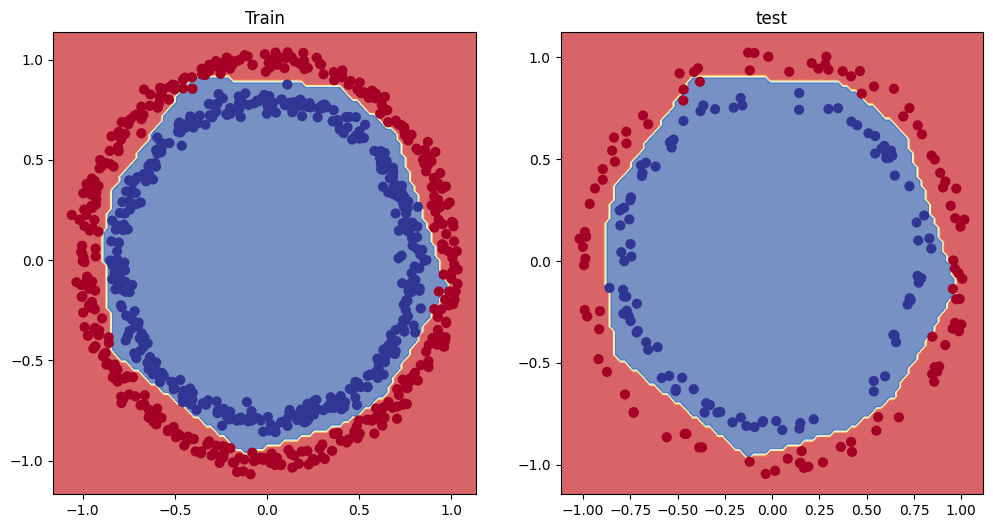

In [81]:
#Plot the decison boundaries for training and testing sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_10,X=X_train,Y=Y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_10,X=X_test,Y=Y_test)

##More calssification evaluation metrics
alongside visualizing our mdel resuls as much as possible , there are a handful of the other classification evaluation metrics
* Accuracy
* Precision
* f-1 score
* Recall
* Confusion Matrix
* Classification report (sckit-learn)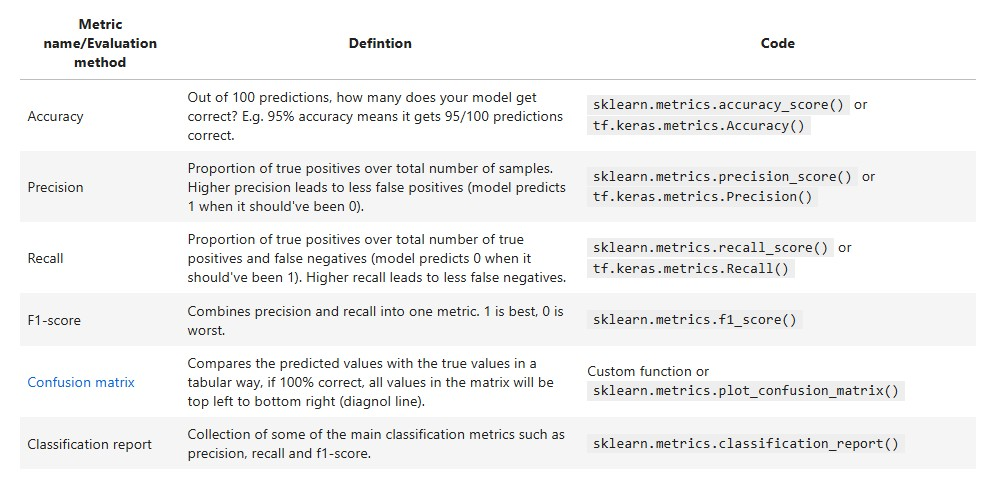

In [83]:
#CHeck the accuracy of our model
loss, accuracy = model_10.evaluate(X_test,Y_test)
print(f"Model loss on the test set: {loss}")
print(f"model accuracy on the test set :{(accuracy*100):.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9806 - loss: 0.0915 
Model loss on the test set: 0.08686947822570801
model accuracy on the test set :98.50%


#Confusion matrix


In [84]:
from sklearn.metrics import confusion_matrix

#Make predictions
Y_preds = model_10.predict(X_test)

#Create confusion matrix
confusion_matrix(Y_test,Y_preds)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [85]:
Y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [86]:
Y_preds[:10]

array([[0.957963  ],
       [0.957963  ],
       [0.957963  ],
       [0.957963  ],
       [0.28925   ],
       [0.00337365],
       [0.8174466 ],
       [0.36911038],
       [0.957963  ],
       [0.00397376]], dtype=float32)

Look's like our predictions array has comeout in **prediction probabilit from** thr standarad output from sigmoid (or softmax) activation functions

In [87]:
#Convert predictions probablities to binary format and view fist 10
tf.round(Y_preds[:10])

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [88]:
#Create a confusion matrix
confusion_matrix(Y_test,tf.round(Y_preds))

array([[98,  3],
       [ 0, 99]])

##prettify a confusion matrix

In [ ]:
#note -  the confusion matrix code we write is a remix of scikitlearn plot_confusin_matrix

####Some important things to remember
Thus this long code is not necssary to learn but learn its concepts
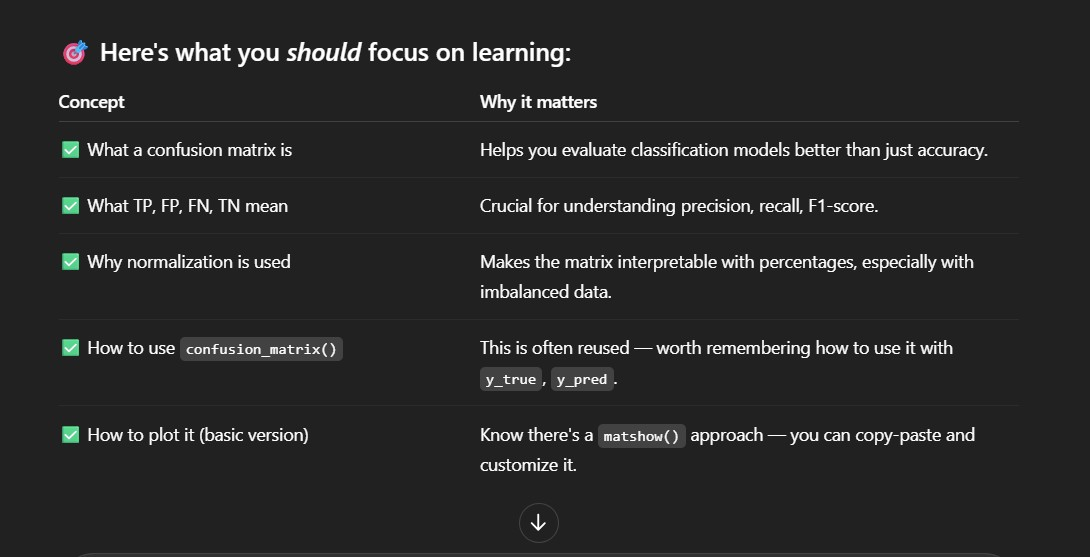

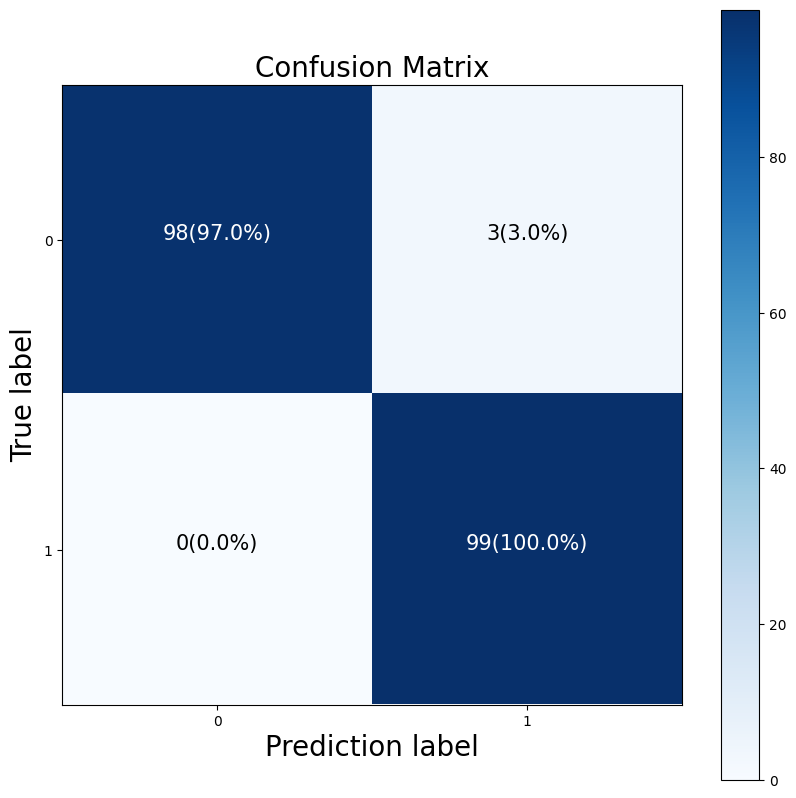

In [91]:
import itertools
figsize = (10,10)

#create confusin matrix
cm = confusion_matrix(Y_test,tf.round(Y_preds))
cm_norm = cm.astype("float")/cm.sum(axis = 1)[:,np.newaxis] #Normalize our confusin matrix
n_classes = cm.shape[0]

#Lets prettify
fig,ax = plt.subplots(figsize = figsize)

#Create matrix plot
cax = ax.matshow(cm,cmap = plt.cm.Blues)
fig.colorbar(cax)

#Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

#Label the axes
ax.set(title = "Confusion Matrix",
       xlabel = "Prediction label",
       ylabel = "True label",
       xticks = np.arange(n_classes),
       yticks = np.arange(n_classes),
       xticklabels = labels,
       yticklabels = labels
       )
#Set the x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

#adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

#Set the threshold for different colors
threshold = (cm.max()+cm.min())/2.

#Plot the text on each cell
for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
 plt.text(j,i,f"{cm[i,j]}({cm_norm[i,j]*100:.1f}%)",
           horizontalalignment = "center",
           color = "white" if cm[i,j] > threshold else "black",
           size = 15),


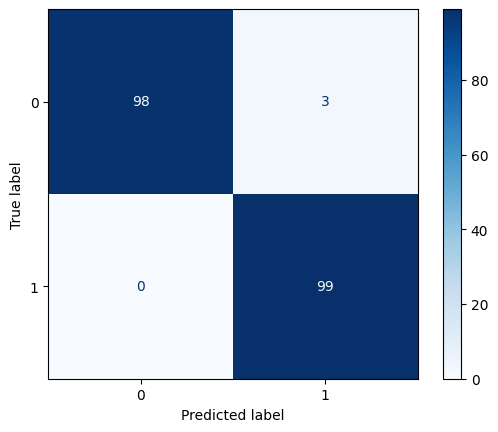

In [93]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

# Create confusion matrix
cm = confusion_matrix(Y_test, tf.round(Y_preds))

# Display it
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()



###Working with a larger example (Multiclass classification)
When you have more than 2 classes as an option its known as multi-class classification
* It measn if u have 3 different classes its multiclass classification

for practising the multi-class classification we're going to build a neural network to clarify images of different items of claothing


The project or alll the concepts related to multiclass classification are in this notebook = https://colab.research.google.com/drive/1qJX4kAloy0YAghoeP1OHaU_dtKksxuC3#scrollTo=IbGsTAJG0Fbq